# Exploring the *abalone* dataset

## Import *abalone* dataset

First we import the *abalone* dataset into our workspace by using the `curl` command

In [1]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data -O
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.names -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  187k  100  187k    0     0   477k      0 --:--:-- --:--:-- --:--:--  479k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4319  100  4319    0     0  16675      0 --:--:-- --:--:-- --:--:-- 16740


Using the `ls` system command we check that the required files have been loaded

In [2]:
!ls

abalone.data  abalone.ipynb  abalone.names  README.md


Using the `cat` system command we read the data description file

In [3]:
!cat *.names

1. Title of Database: Abalone data

2. Sources:

   (a) Original owners of database:
	Marine Resources Division
	Marine Research Laboratories - Taroona
	Department of Primary Industry and Fisheries, Tasmania
	GPO Box 619F, Hobart, Tasmania 7001, Australia
	(contact: Warwick Nash +61 02 277277, wnash@dpi.tas.gov.au)

   (b) Donor of database:
	Sam Waugh (Sam.Waugh@cs.utas.edu.au)
	Department of Computer Science, University of Tasmania
	GPO Box 252C, Hobart, Tasmania 7001, Australia

   (c) Date received: December 1995


3. Past Usage:

   Sam Waugh (1995) "Extending and benchmarking Cascade-Correlation", PhD
   thesis, Computer Science Department, University of Tasmania.

   -- Test set performance (final 1044 examples, first 3133 used for training):
	24.86% Cascade-Correlation (no hidden nodes)
	26.25% Cascade-Correlation (5 hidden nodes)
	21.5%  C4.5
	 0.0%  Linear Discriminate Analysis
	 3.57% k=5 Nearest Neighbour
      (Problem encoded as a classification task)

   -- Data set samp

As we can see most of the basic descriptive statistics are given in the description file, id est we have no missing data and we have a integer response `rings` which can be turned into an `age` variable by `age = rings + 1.5`. 

## Load necessary packages and data

Before proceeding with the analysis it is important to bring in the necessary packages. We will make use of the `pandas` package for data manipulation, the `seaborn` and the `pyplot` submodule of the `matplotlib` package for visualisation, and the `statsmodels` for model fitting.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [5]:
abalone_data = pd.read_csv('abalone.data', names=['sex','length','diameter','height','whole_weight','shucked_weight','viscera_weight','shell_weight','rings'])

## Checking the import

For ease of readibility we provide the necessary variable names and import *abalone* as a `pandas` dataframe `abalone_data`

To make sure the data has been brought in correctly we use the `head` method to display the first 5 records

In [6]:
abalone_data.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
abalone_data.shape

(4177, 9)

In [8]:
abalone_data.isnull().values.any()

False

The records look like they were brought in correctly. Note that from data description we have 4177 records and 9 variables. Using the `shape` method we see that we have the same dimensions. We also remember there were no missing values. Using the `isnull` method we see there are no missing values. Using the `describe` method below we can obtain some basic descriptive of the dataset.

In [9]:
abalone_data.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


These statistics agree with the basic statistics provided in the description file. As we remember from the description file we had 7 continuous variables, 1 categorical variable, and an integer response. Using the `dtypes` method below we see that our imported data is in the correct format.

In [10]:
abalone_data.dtypes

sex                object
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
rings               int64
dtype: object

With confidence in our data being correctly imported and being the correct format we proceed to do some basic Exploratory Data Analysis

## Exploratory Data Analysis

We first perform a pairs plot of the data using the `pairplot` function in `seaborn`. Since we have a categorical variable `sex` we have used this as a grouping variable.

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


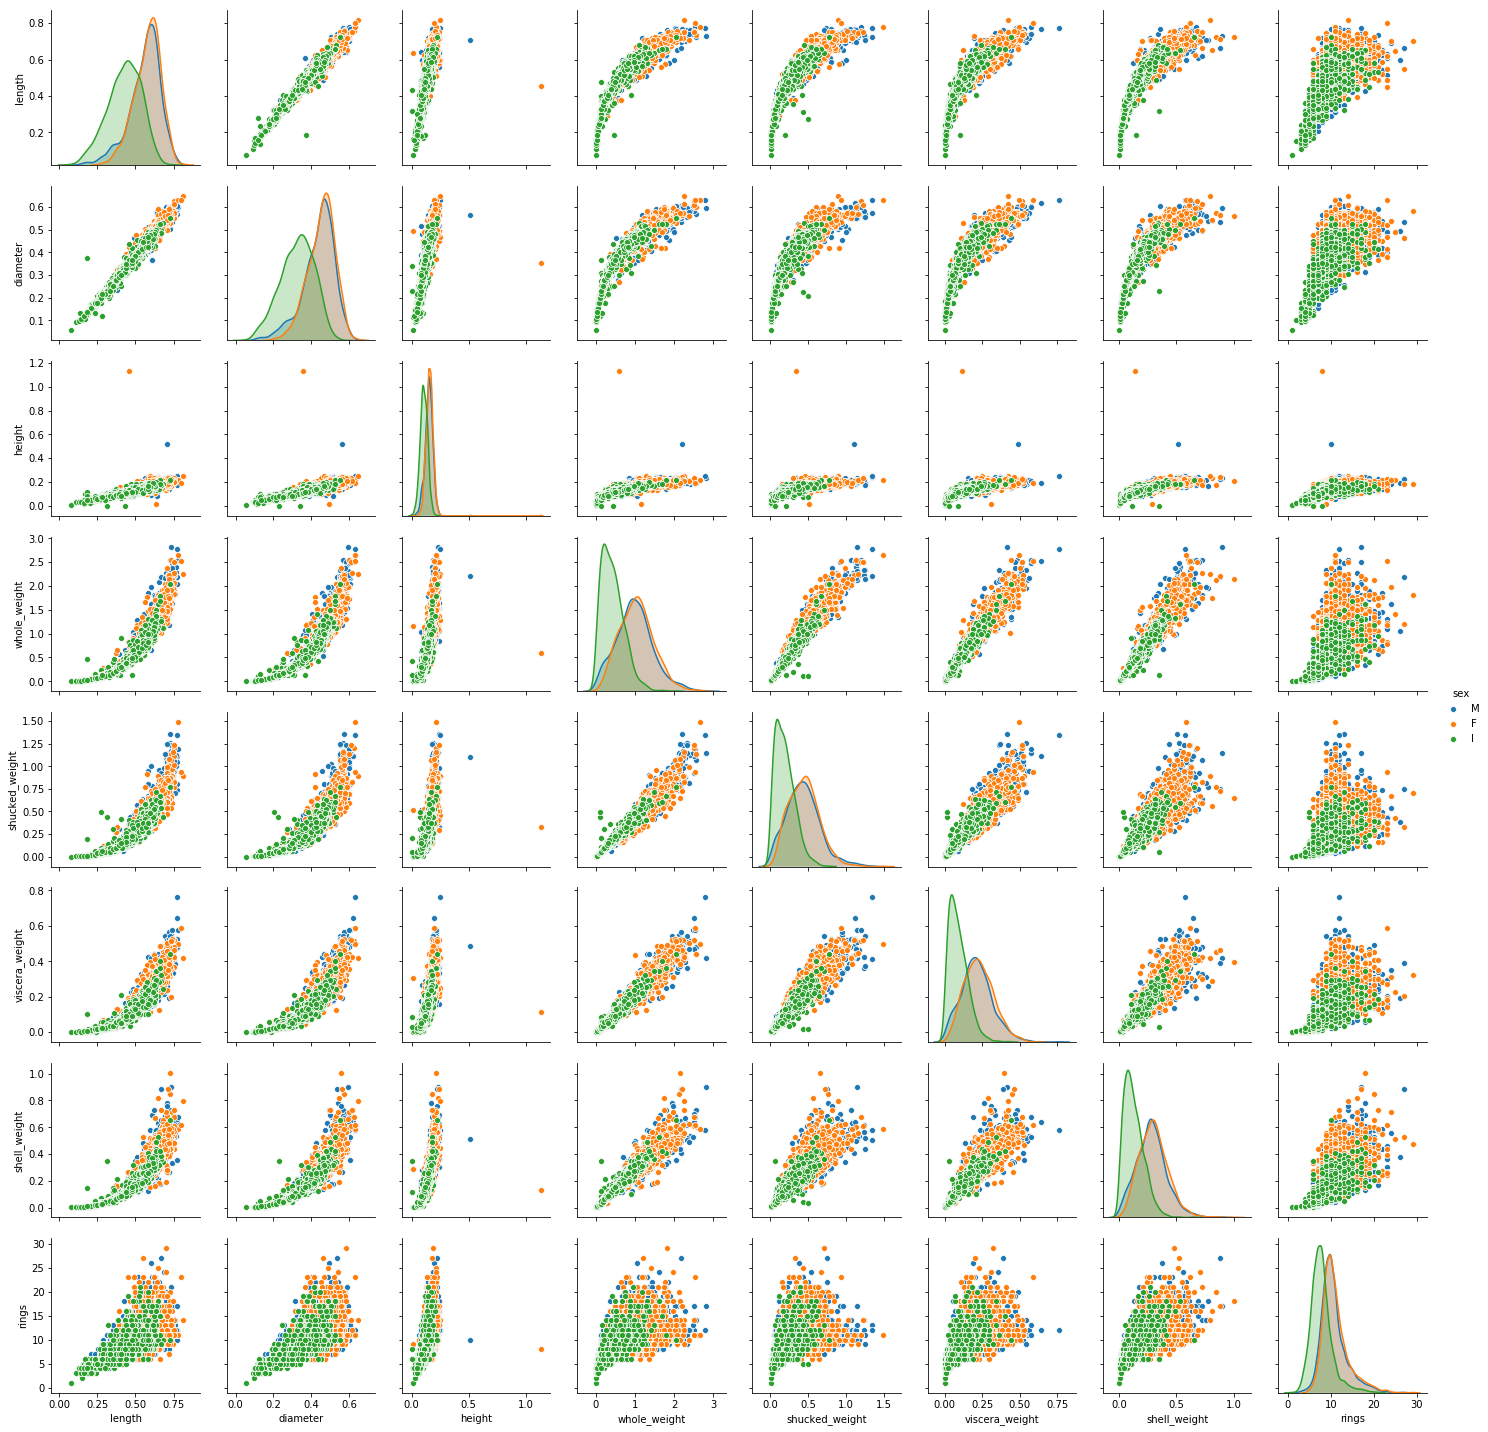

In [11]:
sns.pairplot(abalone_data, hue="sex")

From the pairs plots above it seems clear that the infant abalone are dissimilar to the male and female abalone. The male and female abalone appear to have similar shape and measurements to each other suggesting we could create a new dummy variable `infant` to collapse the `sex` variable. We can also see some potential outliers in the dataset as shown in the `height` and `diameter` plots. The other variables appear to be roughly normally distributed, which is good for our modelling assumptions. We should explore these findings further.

In [12]:
print(abalone_data.groupby('sex').mean())

       length  diameter    height  whole_weight  shucked_weight  \
sex                                                               
F    0.579093  0.454732  0.158011      1.046532        0.446188   
I    0.427746  0.326494  0.107996      0.431363        0.191035   
M    0.561391  0.439287  0.151381      0.991459        0.432946   

     viscera_weight  shell_weight      rings  
sex                                           
F          0.230689      0.302010  11.129304  
I          0.092010      0.128182   7.890462  
M          0.215545      0.281969  10.705497  


In [13]:
print(abalone_data.groupby('sex').median())

     length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
sex                                                                           
F     0.590     0.465   0.160       1.03850         0.44050          0.2240   
I     0.435     0.335   0.110       0.38400         0.16975          0.0805   
M     0.580     0.455   0.155       0.97575         0.42175          0.2100   

     shell_weight  rings  
sex                       
F           0.295     10  
I           0.113      8  
M           0.276     10  


As we observed above in the pairs plots we can see that the the infant category appears to be significantly different to the female and male in mean and median.

We next look at individual histograms to see where the majority of the observations lie to best find the outliers in the `diameter` and `height` variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f72b369b0>,
      dtype=object)

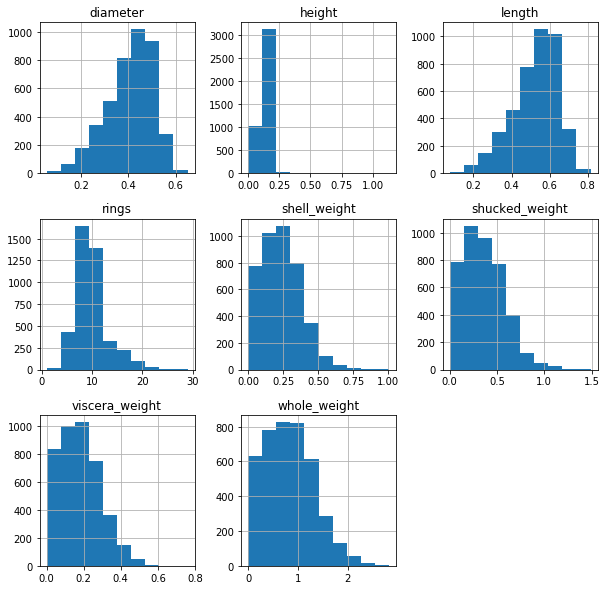

In [14]:
abalone_data.hist(figsize=(10,10))

As we can see it appears that the majority of heights are less than `0.5`, removing these points is suggested as they are most likely incorrectly recorded and will be points of high leverage and influence thus biasing our parameter estimates.

In [22]:
cleaner_abalone_data = abalone_data[abalone_data['height']<0.5]
cleaner_abalone_data.shape

(4175, 9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f61f46198>,
      dtype=object)

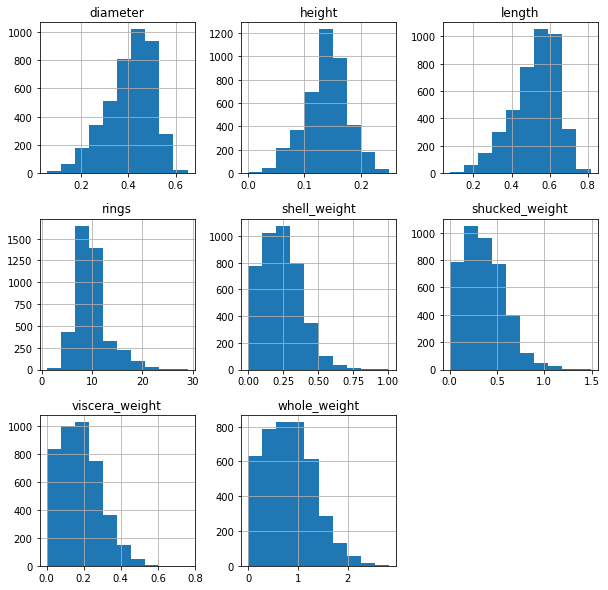

In [16]:
cleaner_abalone_data.hist(figsize=(10,10))

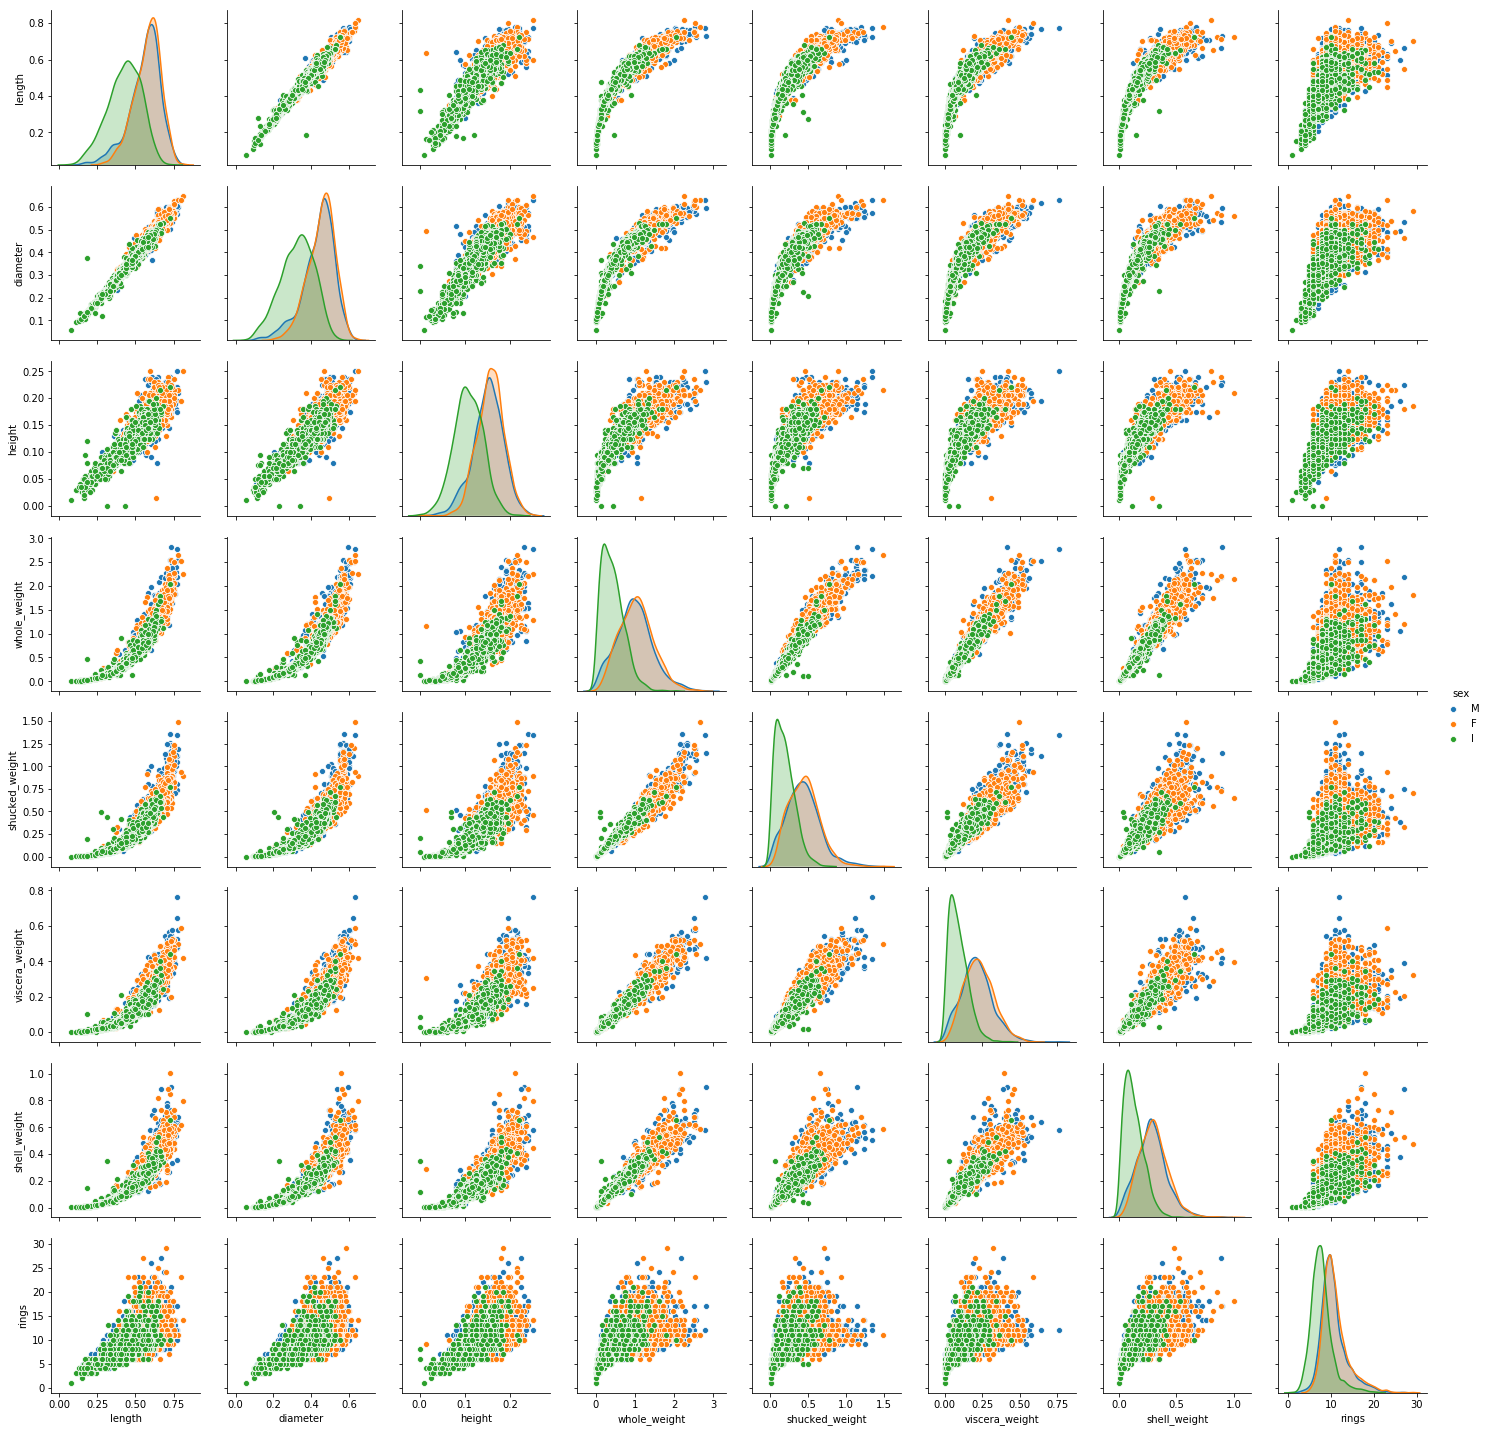

In [17]:
sns.pairplot(cleaner_abalone_data, hue="sex")

This has certainty had a positive impact in making more a realistic dataset and only 2 observations needed to be dropped.

Recall from the data description that the `length` variable is the largest shell measurement. Thus if any variables have their `diameter` measure larger than their `length` they are incorrectly recorded. If the amount of times this occurs is low we might drop all these occurences as our sample size is large.

In [20]:
wrongly_coded = cleaner_abalone_data[cleaner_abalone_data['diameter'] > cleaner_abalone_data['length']]
wrongly_coded.shape

(1, 9)

As we can see there was only a single occurence and thus to err on the side of caution the observation is dropped.

In [23]:
cleaned_abalone_data = cleaner_abalone_data[cleaner_abalone_data['diameter'] < cleaner_abalone_data['length']]
cleaned_abalone_data.shape

(4174, 9)

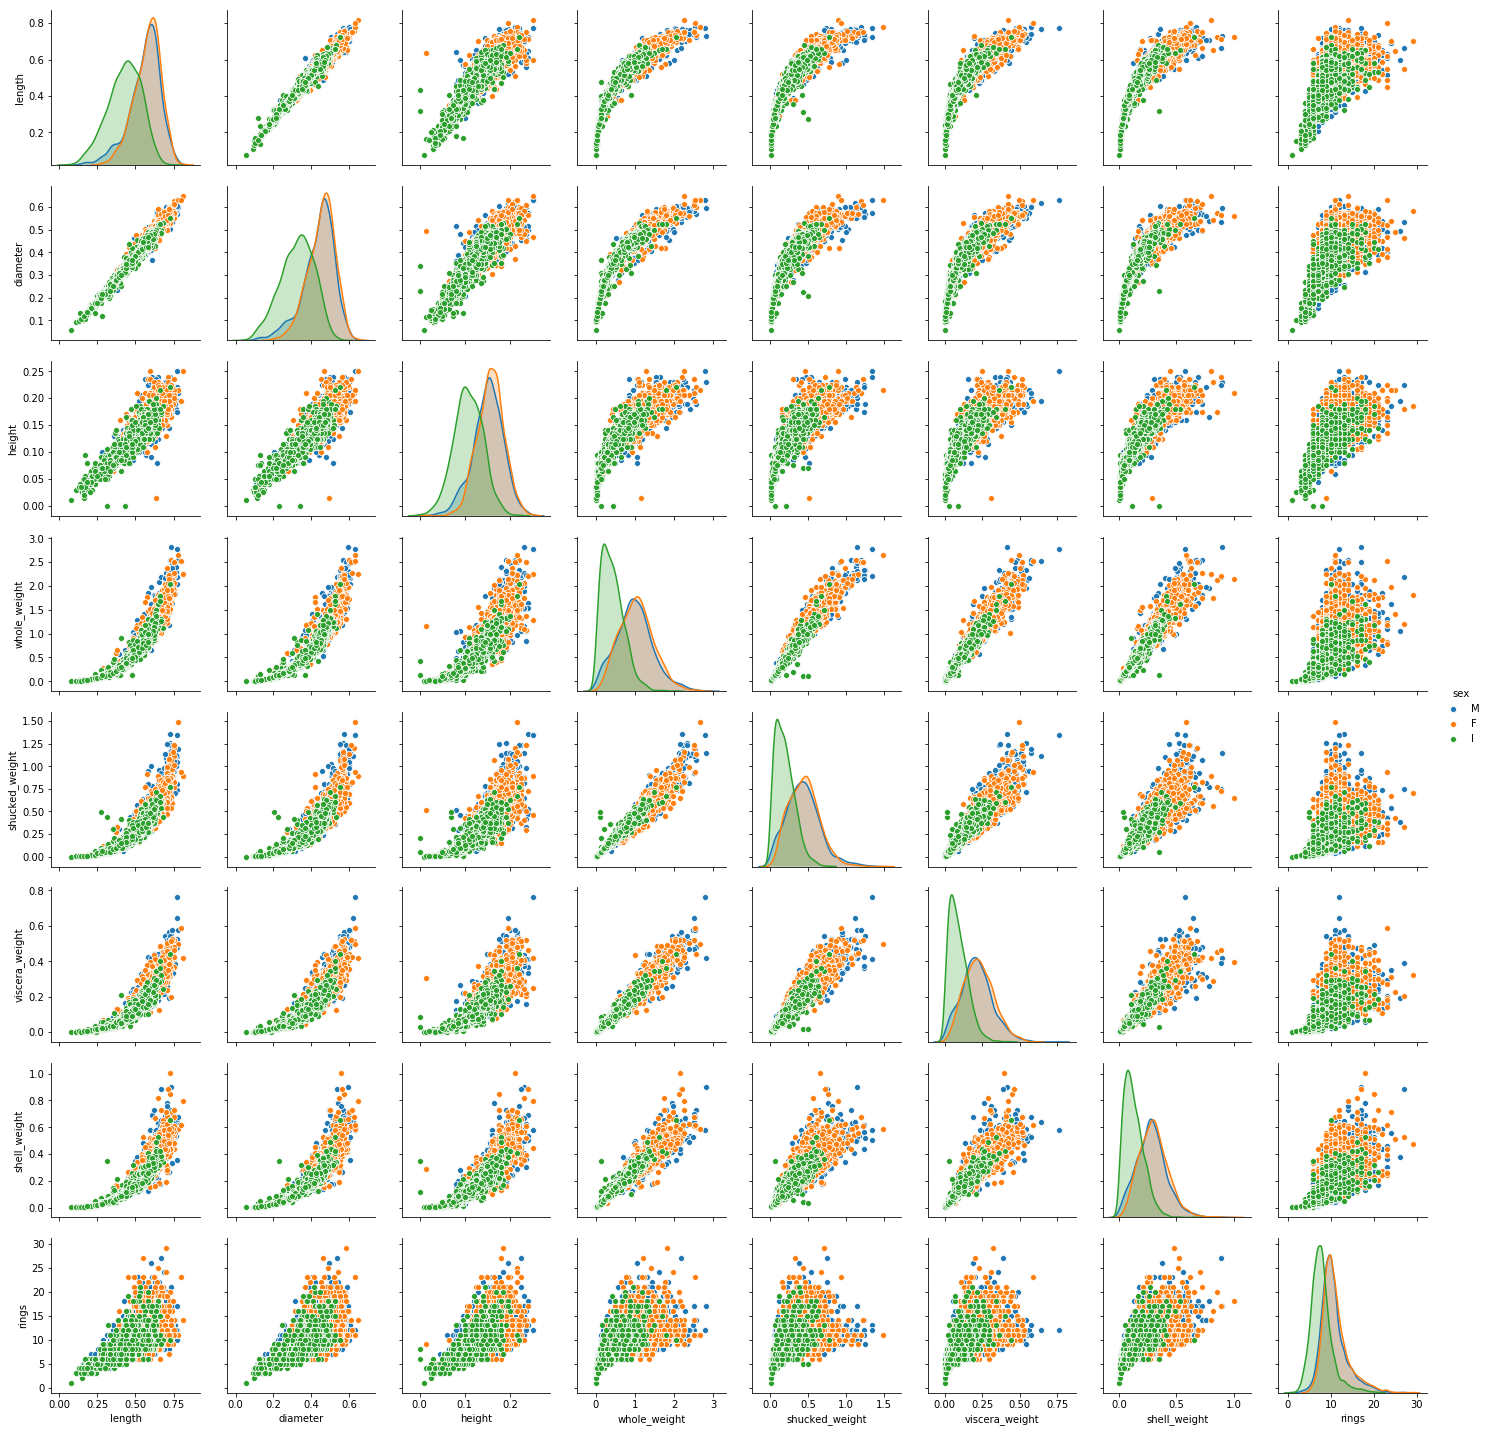

In [24]:
sns.pairplot(cleaned_abalone_data, hue="sex")

As we can see the dataset appears a lot more realistic in its presentation. We should look at the correlations to find variables for selection.

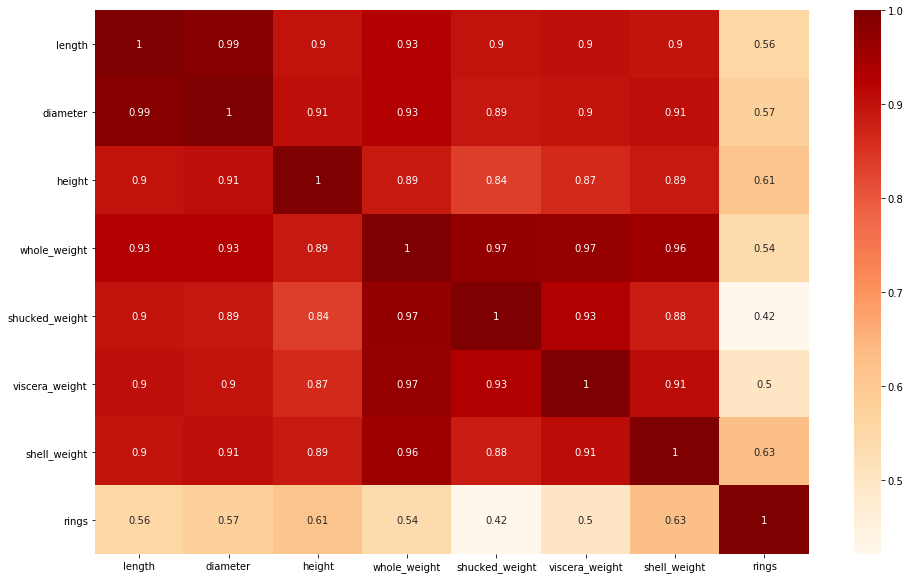

In [25]:
ax, fig = plt.subplots(figsize=(16,10))
correlation_matrix = cleaned_abalone_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="OrRd")
plt.show()

As we will be predicting on the number of `rings` and in turn assessing some measurement of age we need to look at the correlations with the variables and `rings`.

As we might expect most of the variables are similarly correlated with `rings` but all the explanatory variables are highly correlated with each other. Thus a principal components solution is suggested. Since we have a count response Poisson regression is suggested. As the goal of this exercise is not to build the best model, but rather demonstrate the ability to perform an analysis we will naively forget the correlation issues and use all the variables to fit a Poisson regression. We ***highly*** caution against this approach in practice. We would also advise rescaling the data prior to PCA and possibly performing a power transformation like a Box-Cox should a similar analysis need to be done in the future.

We first need to split the data into train and test dataset which we do below using `sklearn` package. In practice we would do this multiple times, but to illustrate 1 split will suffice.

In [27]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(cleaned_abalone_data,test_size=0.3,random_state=2019)

In [41]:
poiss_model = sm.GLM.from_formula("rings~ sex + length + diameter + height + whole_weight + shucked_weight + viscera_weight + shell_weight", train, family = sm.families.Poisson())

In [42]:
poiss_results = poiss_model.fit()

In [43]:
print(poiss_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  rings   No. Observations:                 2921
Model:                            GLM   Df Residuals:                     2911
Model Family:                 Poisson   Df Model:                            9
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6597.6
Date:                Sun, 07 Jul 2019   Deviance:                       1228.8
Time:                        11:35:12   Pearson chi2:                 1.29e+03
No. Iterations:                     4   Covariance Type:             nonrobust
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.3971      0.057     24.332      0.000       1.285       1.510
sex[T.I]          -0.1020      0.018    

As we can see it appears that the model *seems* okay, but the nonsensical negative parameter estimates for `viscera_weight` and `shucked_weight` and non-significance of `length` is almost surely do to multicollinearity which could be alleviated by using a partial least squares or PCA approach.

For now we simply remove `length`, `viscera_weight` and `shucked_weight` and refit the model. Once again this is a very naive approach.

In [38]:
poiss_model_2 = sm.GLM.from_formula("rings~ sex + diameter + height + whole_weight + shell_weight", train, family = sm.families.Poisson())

In [39]:
poiss_results_2 = poiss_model_2.fit()

In [40]:
print(poiss_results_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  rings   No. Observations:                 2921
Model:                            GLM   Df Residuals:                     2914
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6684.2
Date:                Sun, 07 Jul 2019   Deviance:                       1402.0
Time:                        11:34:40   Pearson chi2:                 1.50e+03
No. Iterations:                     4   Covariance Type:             nonrobust
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.5195      0.053     28.886      0.000       1.416       1.623
sex[T.I]        -0.1190      0.018     -6.583 

Comparing deviances we see that the first model is better so we will use it for prediction.

TypeError: predict() missing 1 required positional argument: 'params'